# Proteome evaluation and data visualization

This code aims to guide you throught the evaluation of proteomic data as downloaded from Scaffold. 

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

### File Preparation
The files downloaded from scaffold are '.xls' files and contain a header and two lines at the end of the file which need to be removed prior to uploading the data. After removing the header, save the files as .txt file and upload it to the desired folder on the HPC. It should have following format: 

In [2]:
TEST=pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Proteome_TSC_240216_Fadime_rpom_ProMM.txt', delimiter='\t')
print(TEST)

         #  Visible? Starred? Identified Proteins (2758) Accession Number  \
0        1      True    Empty                    SPO3498          SPO3498   
1        2      True    Empty                    SPO3430          SPO3430   
2        3      True    Empty                    SPO0887          SPO0887   
3        4      True    Empty                    SPO2573          SPO2573   
4        5      True    Empty                    SPO1171          SPO1171   
...    ...       ...      ...                        ...              ...   
2753  2754      True    Empty                    SPO3300          SPO3300   
2754  2755      True    Empty                    SPO2423          SPO2423   
2755  2756      True    Empty                    SPO0025          SPO0025   
2756  2757      True    Empty                    SPO3186          SPO3186   
2757  2758      True    Empty                    SPO0766          SPO0766   

      Alternate ID Molecular Weight Protein Grouping Ambiguity Taxonomy  \


### Load Data
Next we can upload the .txt files as pandas dataframe and print to make sure they are there. 

In [3]:
# DSS3
DSS_3_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_Proteome_TSC_240216_Fadime_rpom_ProMM.txt', delimiter='\t')
print(DSS_3_ProMM)

DSS_3_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_240321_Rpom_ACD.txt', delimiter='\t')
print(DSS_3_ACD)

DSS3stat_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_20240514_DSS3_ACD_stationary.txt', delimiter='\t')
print(DSS3stat_ACD)

# MIT1002
MIT1002_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/Proteome_TSC_240201_Fadime_MIT1002.txt', delimiter='\t')
print(MIT1002_ACD)

MIT1002_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/240430_Fadime_MIT1002_ProMM_TSC.txt', delimiter='\t')
print(MIT1002_ProMM)

MIT1002stat_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/20240514_MIT1002_ACD_stationary.txt', delimiter='\t')
print(MIT1002stat_ACD)

         #  Visible? Starred? Identified Proteins (2758) Accession Number  \
0        1      True    Empty                    SPO3498          SPO3498   
1        2      True    Empty                    SPO3430          SPO3430   
2        3      True    Empty                    SPO0887          SPO0887   
3        4      True    Empty                    SPO2573          SPO2573   
4        5      True    Empty                    SPO1171          SPO1171   
...    ...       ...      ...                        ...              ...   
2753  2754      True    Empty                    SPO3300          SPO3300   
2754  2755      True    Empty                    SPO2423          SPO2423   
2755  2756      True    Empty                    SPO0025          SPO0025   
2756  2757      True    Empty                    SPO3186          SPO3186   
2757  2758      True    Empty                    SPO0766          SPO0766   

      Alternate ID Molecular Weight Protein Grouping Ambiguity Taxonomy  \


### Define Dataframes for Plotting
For plotting each treatment against each other, we can define dataframes where the treatment is linked to the respective Annotation. 

In [5]:
# DSS3 - ProMM, MidLog
DSS3_PML_I = pd.DataFrame(DSS_3_ProMM, columns=["240216_Fadime_astral_1ug_Rpom_1","Annotation" ])
DSS3_PML_II = pd.DataFrame(DSS_3_ProMM, columns=["240216_Fadime_astral_1ug_Rpom_2","Annotation"])
DSS3_PML_III = pd.DataFrame(DSS_3_ProMM, columns=["240216_Fadime_astral_1ug_Rpom_3","Annotation"])
DSS3_PS_I = pd.DataFrame(DSS_3_ProMM, columns=["240216_Fadime_astral_1ug_Rpom_4","Annotation"])
DSS3_PC = pd.DataFrame(DSS_3_ProMM, columns=["240216_Fadime_astral_1ug_Rpom_C","Annotation"])

#DSS3 - ACD, Midlog
DSS3_AML_I = pd.DataFrame(DSS_3_ACD, columns=["240312_2ug_Fadime_1","Annotation" ])
DSS3_AML_II = pd.DataFrame(DSS_3_ACD, columns=["240312_2ug_Fadime_2","Annotation"])
DSS3_AML_III = pd.DataFrame(DSS_3_ACD, columns=["240312_2ug_Fadime_3","Annotation"])
DSS3_AS_I = pd.DataFrame(DSS_3_ACD, columns=["240312_2ug_Fadime_4","Annotation"])


# MIT1002 - ACD, Midlog
MIT1002_AML_I = pd.DataFrame(MIT1002_ACD, columns=["240201_Fadime_1b","Identified Proteins (1608)"])
MIT1002_AML_II = pd.DataFrame(MIT1002_ACD, columns=["240201_Fadime_2b","Identified Proteins (1608)"])
MIT1002_AML_III = pd.DataFrame(MIT1002_ACD, columns=["240201_Fadime_3b","Identified Proteins (1608)"])
MIT1002_AS_I = pd.DataFrame(MIT1002_ACD, columns=["240201_Fadime_4b","Identified Proteins (1608)"])
MIT1002_AC = pd.DataFrame(MIT1002_ACD, columns=["240201_Fadime_Cb","Identified Proteins (1608)"])

# MIT1002 -  ProMM, Midlog
MIT1002_PML_I = pd.DataFrame(MIT1002_ProMM, columns=["240424_Fadime_astral_1ug_Amac_1","Identified Proteins (1608)"])
MIT1002_PML_II = pd.DataFrame(MIT1002_ProMM, columns=["240424_Fadime_astral_1ug_Amac_2","Identified Proteins (1608)"])
MIT1002_PML_III = pd.DataFrame(MIT1002_ProMM, columns=["240424_Fadime_astral_1ug_Amac_3","Identified Proteins (1608)"])
MIT1002_PS_I = pd.DataFrame(MIT1002_ProMM, columns=["240424_Fadime_astral_1ug_Amac_4","Identified Proteins (1608)"])
MIT1002_PC = pd.DataFrame(MIT1002_ProMM, columns=["240424_Fadime_astral_1ug_Amac_C","Identified Proteins (1608)"])


### Plot Treatments and Statistics
In order to simplify the data evaluation, we first define a function, which allows us to plot each treatment against each other and calculate statistics such as R2 values for each condition. 

In [4]:
def plot_and_regression(df1, df2, df3, df4, df5, title='', filename=''):
    x = df1.values
    y = df2.values
    z = df3.values
    yerr = df4.values
    xerr = df5.values
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calculate predicted values
    predicted_values = slope * x + intercept
    
    # Calculate R squared
    r_squared = r_value ** 2

    #PLOT
    plt.figure(figsize=(8, 6))
    
    # Filter data points based on annotation
    protease_indices = df1.index[df3.str.contains('protease', case=False)]
    peptidase_indices = df1.index[df3.str.contains('peptidase', case=False)]
    metalloprotease_indices = df1.index[df3.str.contains('metalloprotease', case=False)]
    metallopeptidase_indices = df1.index[df3.str.contains('metallopeptidase', case=False)]
    non_protease_indices = df1.index[~df3.str.contains('protease', case=False)]
    
    # Plot non-protease data points in black
    #plt.scatter(x[non_protease_indices], y[non_protease_indices], label='Data (Non-Protease)', color='black')
    plt.errorbar(x[non_protease_indices], y[non_protease_indices], yerr=yerr[non_protease_indices], xerr=xerr[non_protease_indices], fmt='o', label='Data (Non-Protease)', color='black')
    
    # Plot selected interesting protein functions in different colors
    #plt.scatter(x[protease_indices], y[protease_indices], label='Data (Protease)', color='blue')
    #plt.scatter(x[peptidase_indices], y[peptidase_indices], label='Data (Peptidase)', color='red')
    #plt.scatter(x[metallopeptidase_indices], y[metallopeptidase_indices], label='Data (Metallopeptidase)', color='pink')
    #plt.scatter(x[metalloprotease_indices], y[metalloprotease_indices], label='Data (Metalloprotease)', color='lightblue')
    
    plt.errorbar(x[protease_indices], y[protease_indices], yerr=yerr[protease_indices], xerr=xerr[protease_indices], fmt='o', label='Data (Protease)', color='blue')
    plt.errorbar(x[peptidase_indices], y[peptidase_indices], yerr=yerr[peptidase_indices], xerr=xerr[peptidase_indices], fmt='o', label='Data (Peptidase)', color='red')
    plt.errorbar(x[metallopeptidase_indices], y[metallopeptidase_indices], yerr=yerr[metallopeptidase_indices], xerr=xerr[metallopeptidase_indices], fmt='o', label='Data (Metallopeptidase)', color='pink')
    plt.errorbar(x[metalloprotease_indices], y[metalloprotease_indices], yerr=yerr[metalloprotease_indices], xerr=xerr[metalloprotease_indices], fmt='o', label='Data (Metalloprotease)', color='lightblue')

    
    plt.plot(x, predicted_values, color='red', label='Linear Regression')
    plt.title(f'{title} (R² = {r_squared:.2f})')
    plt.xlabel(df1.name)
    plt.ylabel(df2.name)
    plt.legend()
    #plt.savefig(filename, format='pdf')
    plt.show()
    
    return slope, intercept, std_err, df1, df2, df3

Now we can apply the function plot_and_regression to each condition and determine the R^2. 

In [6]:
# DSS-3 - ProMM
plot_and_regression(DSS3_PML_I["240216_Fadime_astral_1ug_Rpom_1"], DSS3_PML_II["240216_Fadime_astral_1ug_Rpom_2"], DSS3_PML_I["Annotation"], title='DSS3_ML_I vs. DSS3_ML_II')
plot_and_regression(DSS3_PML_I["240216_Fadime_astral_1ug_Rpom_1"], DSS3_PML_III["240216_Fadime_astral_1ug_Rpom_3"], DSS3_PML_I["Annotation"], title='DSS3_ML_I vs. DSS3_ML_III')
plot_and_regression(DSS3_PML_II["240216_Fadime_astral_1ug_Rpom_2"], DSS3_PML_III["240216_Fadime_astral_1ug_Rpom_3"], DSS3_PML_II["Annotation"], title='DSS3_ML_II vs. DSS3_ML_III')
plot_and_regression(DSS3_PML_I["240216_Fadime_astral_1ug_Rpom_1"], DSS3_PS_I["240216_Fadime_astral_1ug_Rpom_4"], DSS3_PML_I["Annotation"], title='DSS3_ML_I vs. DSS3_S_I')
plot_and_regression(DSS3_PML_II["240216_Fadime_astral_1ug_Rpom_2"], DSS3_PS_I["240216_Fadime_astral_1ug_Rpom_4"], DSS3_PML_II["Annotation"], title='DSS3_ML_II vs. DSS3_S_I')
plot_and_regression(DSS3_PML_III["240216_Fadime_astral_1ug_Rpom_3"], DSS3_PS_I["240216_Fadime_astral_1ug_Rpom_4"], DSS3_PML_III["Annotation"], title='DSS3_ML_III vs. DSS3_S_I')

#MIT1002 - ACD
plot_and_regression(MIT1002_AML_I["240201_Fadime_1b"], MIT1002_AML_II["240201_Fadime_2b"], MIT1002_AML_I["Identified Proteins (1608)"], title='MIT1002_ML_I vs. MIT1002_ML_II')
plot_and_regression(MIT1002_AML_I["240201_Fadime_1b"], MIT1002_AML_III["240201_Fadime_3b"], MIT1002_AML_I["Identified Proteins (1608)"], title='MIT1002_ML_I vs. MIT1002_ML_III')
plot_and_regression(MIT1002_AML_II["240201_Fadime_2b"], MIT1002_AML_III["240201_Fadime_3b"], MIT1002_AML_II["Identified Proteins (1608)"], title='MIT1002_ML_II vs. MIT1002_ML_III')
plot_and_regression(MIT1002_AML_I["240201_Fadime_1b"], MIT1002_AS_I["240201_Fadime_4b"], MIT1002_AML_I["Identified Proteins (1608)"], title='MIT1002_ML_I vs. MIT1002_S_I')
plot_and_regression(MIT1002_AML_II["240201_Fadime_2b"], MIT1002_AS_I["240201_Fadime_4b"], MIT1002_AML_II["Identified Proteins (1608)"], title='MIT1002_ML_II vs. MIT1002_S_I')
plot_and_regression(MIT1002_AML_III["240201_Fadime_3b"], MIT1002_AS_I["240201_Fadime_4b"], MIT1002_AML_III["Identified Proteins (1608)"], title='MIT1002_ML_III vs. MIT1002_S_I')


TypeError: plot_and_regression() missing 2 required positional arguments: 'df4' and 'df5'

## Statistics
### Average Triplicates
Next we can average the triplicate analyses and include statistics in our plots. 

In [5]:
# Selecting the relevant columns 
DSS3_ProMM123 = DSS_3_ProMM[['240216_Fadime_astral_1ug_Rpom_1', '240216_Fadime_astral_1ug_Rpom_2', '240216_Fadime_astral_1ug_Rpom_3']] 
DSS3_ACD123 = DSS_3_ACD[['240312_2ug_Fadime_1', '240312_2ug_Fadime_2', '240312_2ug_Fadime_3']] 
DSS3stat_ACD123 = DSS3stat_ACD[['20240430_RpomDSS3_ACD_stationary1', '20240430_RpomDSS3_ACD_stationary2', '20240430_RpomDSS3_ACD_stationary3']] 
MIT1002_ACD123 = MIT1002_ACD[['240201_Fadime_1b', '240201_Fadime_2b', '240201_Fadime_3b']] 
MIT1002_ProMM123 = MIT1002_ProMM[['240424_Fadime_astral_1ug_Amac_1', '240424_Fadime_astral_1ug_Amac_2', '240424_Fadime_astral_1ug_Amac_3']] 
MIT1002stat_ACD123 = MIT1002stat_ACD[['20240430_AmacMIT1002_ACD_stationary1', '20240430_AmacMIT1002_ACD_stationary2', '20240430_AmacMIT1002_ACD_stationary3']] 


# Computing the row-wise average 
row_average_DSS3P = DSS3_ProMM123.mean(axis=1) 
row_average_DSS3A = DSS3_ACD123.mean(axis=1) 
row_average_DSS3Astat = DSS3stat_ACD123.mean(axis=1)
row_average_MITA = MIT1002_ACD123.mean(axis=1) 
row_average_MITP = MIT1002_ProMM123.mean(axis=1)
row_average_MITAstat = MIT1002stat_ACD123.mean(axis=1)

# Determining standard deviation
std_DSS3P = DSS3_ProMM123.std(axis=1) 
std_DSS3A = DSS3_ACD123.std(axis=1) 
std_DSS3Astat = DSS3stat_ACD123.std(axis=1)
std_MITA = MIT1002_ACD123.std(axis=1)
std_MITP = MIT1002_ProMM123.std(axis=1)
std_MITAstat = MIT1002stat_ACD123.std(axis=1)

# Adding the row-wise average as a new column in the DataFrame 
DSS_3_ProMM['Row_Average'] = row_average_DSS3P 
DSS_3_ACD['Row_Average'] = row_average_DSS3A
DSS3stat_ACD['Row_Average'] = row_average_DSS3Astat
MIT1002_ACD['Row_Average'] = row_average_MITA
MIT1002_ProMM['Row_Average'] = row_average_MITP
MIT1002stat_ACD['Row_Average'] = row_average_MITAstat

# Adding the standard devation as new column in the DataFrame
DSS_3_ProMM['STD'] = std_DSS3P 
DSS_3_ACD['STD'] = std_DSS3A
DSS3stat_ACD['STD'] = std_DSS3Astat
MIT1002_ACD['STD'] = std_MITA
MIT1002_ProMM['STD'] = std_MITP
MIT1002stat_ACD['STD'] = std_MITAstat

# Displaying the updated DataFrame 
print(DSS_3_ProMM)
print(DSS_3_ACD)
print(DSS3stat_ACD)
print(MIT1002_ACD)
print(MIT1002_ProMM)
print(MIT1002stat_ACD)

         #  Visible? Starred? Identified Proteins (2758) Accession Number  \
0        1      True    Empty                    SPO3498          SPO3498   
1        2      True    Empty                    SPO3430          SPO3430   
2        3      True    Empty                    SPO0887          SPO0887   
3        4      True    Empty                    SPO2573          SPO2573   
4        5      True    Empty                    SPO1171          SPO1171   
...    ...       ...      ...                        ...              ...   
2753  2754      True    Empty                    SPO3300          SPO3300   
2754  2755      True    Empty                    SPO2423          SPO2423   
2755  2756      True    Empty                    SPO0025          SPO0025   
2756  2757      True    Empty                    SPO3186          SPO3186   
2757  2758      True    Empty                    SPO0766          SPO0766   

      Alternate ID Molecular Weight Protein Grouping Ambiguity Taxonomy  \


In [6]:
# Define Dataframes for plotting
DSS3_ProMM_MidLog = pd.DataFrame(DSS_3_ProMM, columns=["Row_Average", "Annotation"])
DSS3_ACD_MidLog = pd.DataFrame(DSS_3_ACD, columns=["Row_Average", "Annotation"])
DSS3_ACD_Stationary = pd.DataFrame(DSS3stat_ACD, columns=["Row_Average", "Annotation"])

MIT1002_ACD_MidLog = pd.DataFrame(MIT1002_ACD, columns=["Row_Average", "Identified Proteins (1608)"])
MIT1002_ProMM_ML = pd.DataFrame(MIT1002_ProMM, columns=["Row_Average", "Annotation"])
MIT1002_ACD_Stationary = pd.DataFrame(MIT1002stat_ACD, columns=["Row_Average", "Identified Proteins (2559)"])

# Rename Identified Proteins column for MIT1002
MIT1002_ACD_MidLog.rename(columns={'Identified Proteins (1608)': 'Annotation'}, inplace=True)
MIT1002_ACD_Stationary.rename(columns={'Identified Proteins (2559)': 'Annotation'}, inplace=True)
MIT1002_ProMM_ML.rename(columns={'Identified Proteins (2893)': 'Annotation'}, inplace=True)

print(MIT1002_ACD_Stationary)
print(MIT1002_ACD_MidLog)
print(MIT1002_ProMM_ML)

      Row_Average                                         Annotation
0     2072.000000  translation elongation factor 1A (EF-1A/EF-Tu)...
1     1142.333333  translation elongation factor 2 (EF-2/EF-G) [A...
2     1035.666667   molecular chaperone DnaK [Alteromonas macleodii]
3      971.333333  ATP-dependent Clp protease ATP-binding subunit...
4      870.666667  small subunit ribosomal protein S1 [Alteromona...
...           ...                                                ...
2554     1.333333  hypothetical protein MIT1002_00730 [Alteromona...
2555     0.666667         glutamate 5-kinase [Alteromonas macleodii]
2556     0.666667                PAAT family [Alteromonas macleodii]
2557     0.666667  5-histidylcysteine sulfoxide synthase [Alterom...
2558     0.666667              gamma subunit [Alteromonas macleodii]

[2559 rows x 2 columns]
      Row_Average                                         Annotation
0      443.000000  translation elongation factor 1A (EF-1A/EF-Tu)...
1      33

## Match Annotations of different files

Each of the experiments will have different proteins showing up at different numbers. In order to being able to compare treatments from different samples, we need to match the protein annotations, therefore the length of the arrays and fill in 0 for when the protein appears in one treatment but not the other. 


In [7]:
# Sort values by the SPO annotation for the DSS3 files and remove all columns except the accession number, row average, and annotation
Sorted_DSS_3_ProMM = DSS_3_ProMM.sort_values(by='Accession Number')
DF_DSS_3_ProMM = pd.DataFrame(Sorted_DSS_3_ProMM, columns=["Accession Number","Annotation", "Row_Average", "STD"])

Sorted_DSS_3_ACD = DSS_3_ACD.sort_values(by='Accession Number')
DF_DSS_3_ACD = pd.DataFrame(Sorted_DSS_3_ACD, columns=["Accession Number","Annotation", "Row_Average", "STD"])

Sorted_DSS3stat_ACD = DSS3stat_ACD.sort_values(by='Accession Number')
DF_DSS3stat_ACD = pd.DataFrame(Sorted_DSS3stat_ACD, columns=["Accession Number","Annotation", "Row_Average", "STD"])

print(DF_DSS_3_ProMM)
print(DF_DSS_3_ACD)
print(DF_DSS3stat_ACD)

# Sort values by the annotation (alphabet) for the MIT1002 files  and remove all columns except the accession number, row average, and annotation
MIT1002_ProMM_ML = pd.DataFrame(MIT1002_ProMM, columns=["Accession Number","Identified Proteins (2893)", "Row_Average", "STD"])
MIT1002_ACD_ML = pd.DataFrame(MIT1002_ACD, columns=["Accession Number","Identified Proteins (1608)", "Row_Average", "STD"])
MIT1002_ACD_S = pd.DataFrame(MIT1002stat_ACD, columns=["Accession Number","Identified Proteins (2559)", "Row_Average", "STD"])

MIT1002_ACD_ML.rename(columns={'Identified Proteins (1608)': 'Annotation'}, inplace=True)
MIT1002_ACD_S.rename(columns={'Identified Proteins (2559)': 'Annotation'}, inplace=True)
MIT1002_ProMM_ML.rename(columns={'Identified Proteins (2893)': 'Annotation'}, inplace=True)

Sorted_MIT1002_ProMM_ML = MIT1002_ProMM_ML.sort_values(by='Annotation')
Sorted_MIT1002_ACD_ML = MIT1002_ACD_ML.sort_values(by='Annotation')
Sorted_MIT1002_ACD_S = MIT1002_ACD_S.sort_values(by='Annotation')

print(Sorted_MIT1002_ProMM_ML)
print(Sorted_MIT1002_ACD_ML)
print(Sorted_MIT1002_ACD_S)


     Accession Number                                         Annotation  \
1357          SPO0001               glucose inhibited division protein A   
1819          SPO0002               glucose-inhibited division protein B   
1123          SPO0003               chromosome partitioning protein ParA   
576           SPO0004               chromosome partitioning protein parB   
1851          SPO0006  oxygen-independent coproporphyrinogen III oxid...   
...               ...                                                ...   
2213         SPOA0441                                            Unknown   
906          SPOA0444                                            Unknown   
2666         SPOA0445                                            Unknown   
2411         SPOA0451                                            Unknown   
1346         SPOA0452                                            Unknown   

      Row_Average       STD  
1357    14.333333  2.516611  
1819     8.333333  0.577350

Now that we sorted the values, we can write a function that allows us to combine the dataframes of the individual treatments into one, sorted by the annotations. 

In [8]:
# Merge the two dataframes that need to be compared
DSS3_MidLog = pd.merge(DF_DSS_3_ACD, DF_DSS_3_ProMM, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
DSS3_MLStat = pd.merge(DF_DSS_3_ACD, DF_DSS3stat_ACD, on="Accession Number", how="outer", suffixes=('_ML', '_S'))

# Replace NaN with 0
DSS3_MidLog.fillna(0, inplace=True)
DSS3_MLStat.fillna(0, inplace=True)

# In the Annotations column, integers are not allowed. Replace all 0 with "Unkown"
DSS3_MidLog['Annotation_ACD'] = DSS3_MidLog['Annotation_ACD'].replace(0, "Unknown")
DSS3_MLStat['Annotation_ML'] = DSS3_MLStat['Annotation_ML'].replace(0, "Unknown")
print(DSS3_MidLog)
print(DSS3_MLStat)

# The same is done for MIT1002
MIT1002_MidLog = pd.merge(Sorted_MIT1002_ACD_ML, Sorted_MIT1002_ProMM_ML, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
MIT1002_MLStat = pd.merge(Sorted_MIT1002_ACD_ML, Sorted_MIT1002_ACD_S, on="Accession Number", how="outer", suffixes=('_ML', '_S'))

MIT1002_MidLog.fillna(0, inplace=True)
MIT1002_MLStat.fillna(0, inplace=True)

MIT1002_MidLog['Annotation_ACD'] = MIT1002_MidLog['Annotation_ACD'].replace(0, "Unknown")
MIT1002_MLStat['Annotation_ML'] = MIT1002_MLStat['Annotation_ML'].replace(0, "Unknown")
print(MIT1002_MidLog)
print(MIT1002_MLStat)


     Accession Number                                     Annotation_ACD  \
0             SPO0001               glucose inhibited division protein A   
1             SPO0002               glucose-inhibited division protein B   
2             SPO0003               chromosome partitioning protein ParA   
3             SPO0004               chromosome partitioning protein parB   
4             SPO0006  oxygen-independent coproporphyrinogen III oxid...   
...               ...                                                ...   
3228         SPOA0337                                            Unknown   
3229         SPOA0338                                            Unknown   
3230         SPOA0381                                            Unknown   
3231         SPOA0382                                            Unknown   
3232         SPOA0425                                            Unknown   

      Row_Average_ACD   STD_ACD  \
0           56.666667  6.506407   
1            8.66

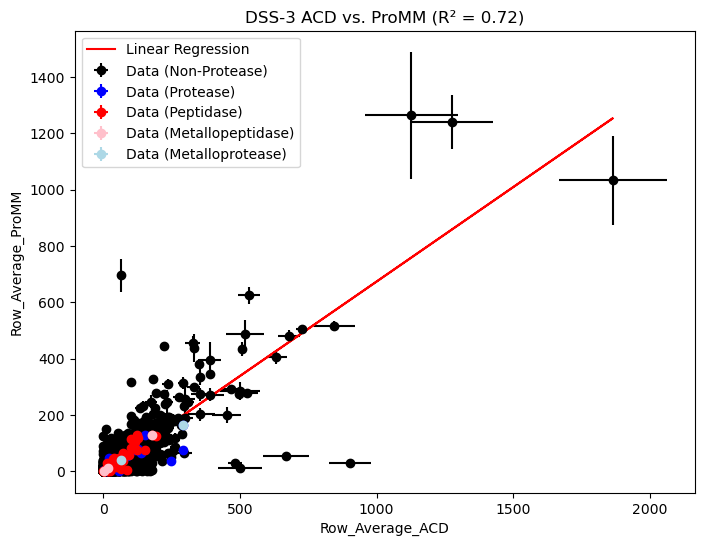

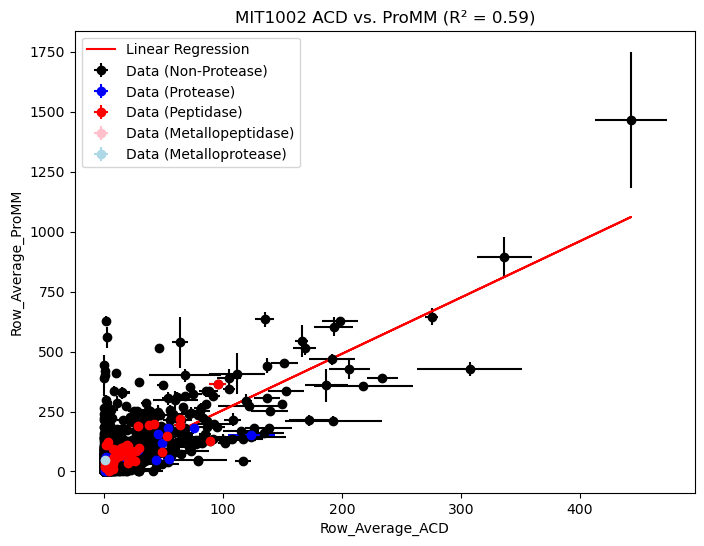

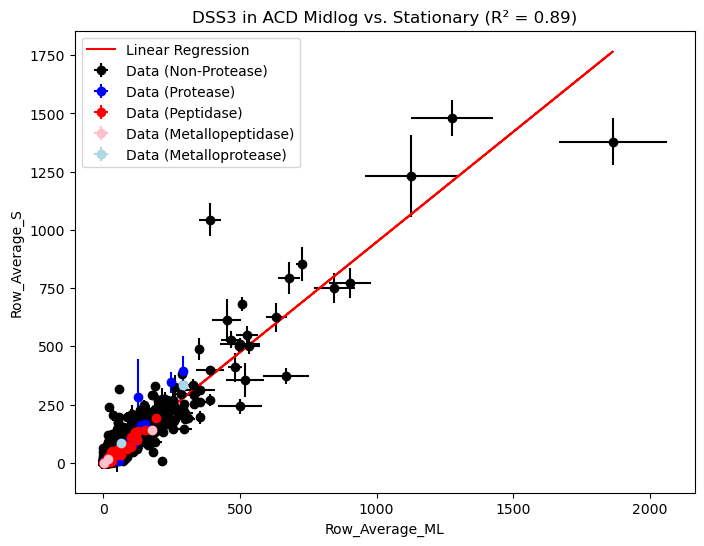

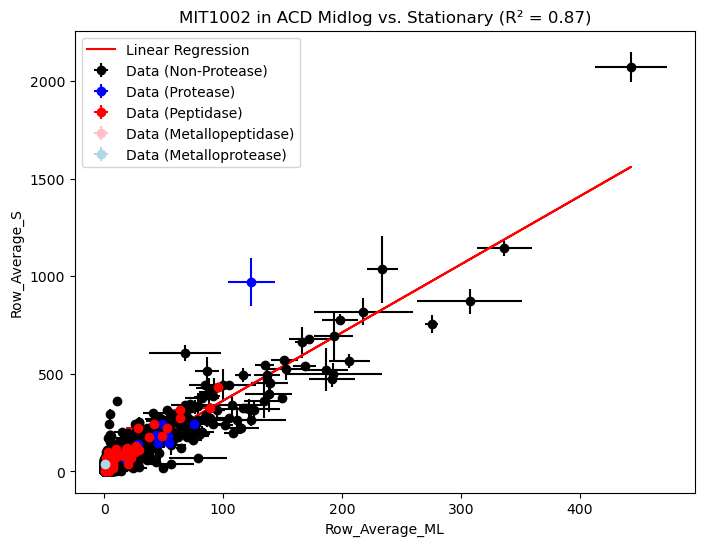

(3.4903031668005426,
 13.56137212615031,
 0.026187044344185943,
 0       14.666667
 1        0.000000
 2       19.666667
 3        3.000000
 4       11.666667
           ...    
 2609     0.000000
 2610     0.000000
 2611     0.000000
 2612     0.000000
 2613     0.000000
 Name: Row_Average_ML, Length: 2614, dtype: float64,
 0        40.000000
 1        37.666667
 2       139.000000
 3        37.000000
 4        53.000000
            ...    
 2609      4.000000
 2610      1.666667
 2611      2.000000
 2612      5.000000
 2613      1.000000
 Name: Row_Average_S, Length: 2614, dtype: float64,
 0       (S)-ureidoglycine-glyoxylate aminotransferase ...
 1           (p)ppGpp synthetase I [Alteromonas macleodii]
 2                               1 [Alteromonas macleodii]
 3       1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino...
 4       1-acyl-sn-glycerol-3-phosphate acyltransferase...
                               ...                        
 2609                                           

In [9]:
#Plot
plot_and_regression(DSS3_MidLog["Row_Average_ACD"], DSS3_MidLog["Row_Average_ProMM"], DSS3_MidLog["Annotation_ACD"], DSS3_MidLog["STD_ProMM"], DSS3_MidLog["STD_ACD"], title='DSS-3 ACD vs. ProMM', filename ="DSS3_ACD_ProMM.pdf")
plot_and_regression(MIT1002_MidLog["Row_Average_ACD"], MIT1002_MidLog["Row_Average_ProMM"], MIT1002_MidLog["Annotation_ACD"], MIT1002_MidLog["STD_ProMM"], MIT1002_MidLog["STD_ACD"], title='MIT1002 ACD vs. ProMM', filename ="MIT1002_ACD_ProMM.pdf")
plot_and_regression(DSS3_MLStat["Row_Average_ML"], DSS3_MLStat["Row_Average_S"], DSS3_MLStat["Annotation_ML"], DSS3_MLStat["STD_S"], DSS3_MLStat["STD_ML"], title='DSS3 in ACD Midlog vs. Stationary', filename="DSS3_ACD_MLS.pdf")
plot_and_regression(MIT1002_MLStat["Row_Average_ML"], MIT1002_MLStat["Row_Average_S"], MIT1002_MLStat["Annotation_ML"], MIT1002_MLStat["STD_S"], MIT1002_MLStat["STD_ML"], title='MIT1002 in ACD Midlog vs. Stationary', filename="MIT1002_ACD_MLS.pdf")


### Extract Proteins from Plots

Now that we have the plots with error bars etc. we need to figure out which of these is significantly deviating from the linear regression line. Therefore we first need to identify the 5% confidence interval. Once that is done, all the datapoints outside of the confidence interval should be printed, including their annotation and their mean spectral count. 

In [10]:
#def extract_protein_annotations(df, df2, annotations): # df is the entire dataframe. df2 is the Annotations column, annotations is the name of the annotation that you search for. 
    
    # Filter data points based on annotation
 #   {annotations}_indices = df.index[df2.str.contains(f'{annotations}', case=False)]

def extract_outliers(slope, intercept, std_err, df1, df2, df3, filename, confidence_interval=0.95):
    x = df1.values
    y = df2.values
    z = df3.values
    
    # Calculate predicted values
    predicted_values = slope * x + intercept
    
    # Calculate residuals
    residuals = y - predicted_values
    
    # Calculate standard deviation of residuals
    residuals_std = np.std(residuals)
    
    # Calculate the confidence interval for the residuals
    conf_interval = residuals_std * stats.t.ppf((1 + confidence_interval) / 2., len(x)-1)
    
    # Identify points outside the confidence interval
    outlier_indices = np.where(np.abs(residuals) > conf_interval)[0]
    
    # Extract the corresponding rows from the DataFrame
    outliers = df1.iloc[outlier_indices]
    outlier_annotations = df3.iloc[outlier_indices]
    
    # Create a DataFrame to save the outliers and their annotations
    outlier_df = pd.DataFrame({
        'Value': outliers,
        'Annotation': outlier_annotations,
        'Predicted': predicted_values[outlier_indices],
        'Residual': residuals[outlier_indices]
    })
    
    # Write the DataFrame to a file
    #outlier_df.to_csv(filename, sep='\t', index=False)
    
    return outlier_df

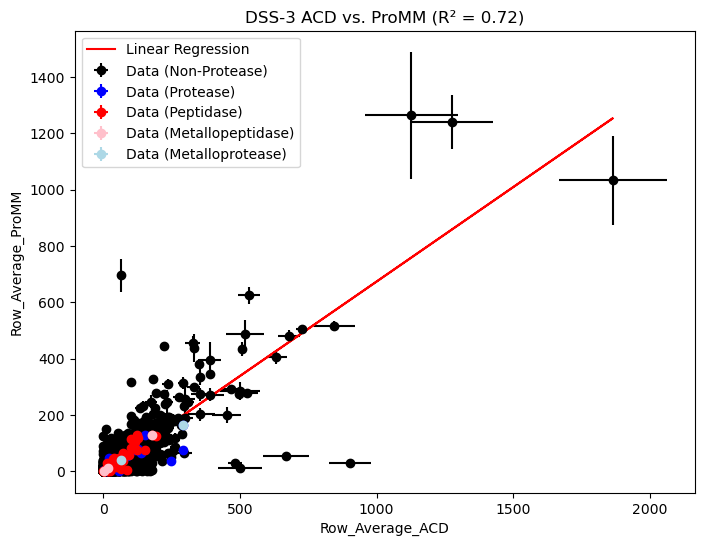

,Value,Annotation,Predicted,Residual
75,102.000000,betaine aldehyde dehydrogenase,71.071676,-65.738342
95,101.000000,poly(3-hydroxyalkanoate) polymerase,70.400353,-67.733686
108,90.000000,PAN domain protein,63.015802,73.317531
167,178.666667,alpha-aminoadipic semialdehyde dehydrogenase,122.539755,-118.539755
233,235.333333,acetyl-CoA acetyltransferase,160.581378,149.085288
...,...,...,...,...
2928,500.000000,Unknown,338.258139,-328.258139
2929,526.333333,Unknown,355.936305,-76.269638
3086,0.000000,Unknown,2.596753,87.069914
3197,0.000000,Unknown,2.596753,123.069914


In [11]:
##Plot
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_MidLog["Row_Average_ACD"], DSS3_MidLog["Row_Average_ProMM"], DSS3_MidLog["Annotation_ACD"], DSS3_MidLog["STD_ProMM"], DSS3_MidLog["STD_ACD"], title='DSS-3 ACD vs. ProMM', filename ="DSS3_ACD_ProMM.pdf")

# Then extract the outliers
extract_outliers(slope, intercept, std_err, DSS3_MidLog["Row_Average_ACD"], DSS3_MidLog["Row_Average_ProMM"], DSS3_MidLog["Annotation_ACD"], filename='DSS3_ML_ACDProMM_outliers.csv')

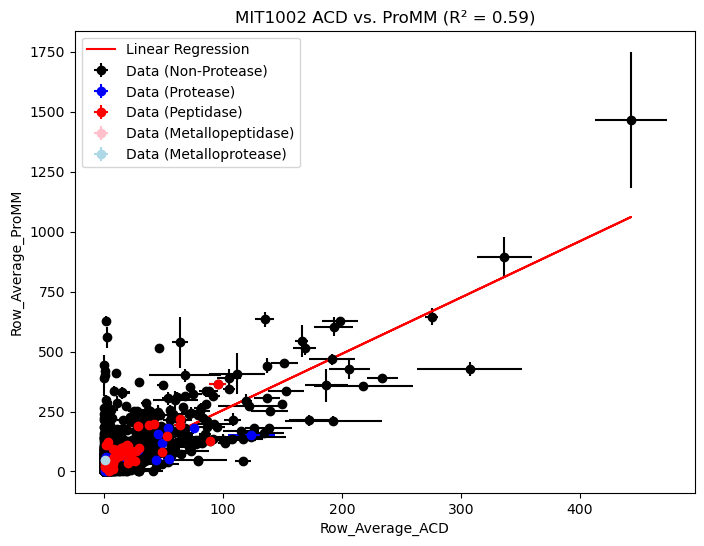

,Value,Annotation,Predicted,Residual
27,0.000000,2-isopropylmalate synthase [Alteromonas macleo...,21.300989,122.032344
65,28.000000,3-hydroxyacyl-CoA dehydrogenase / enoyl-CoA hy...,86.980464,167.019536
72,0.333333,3-isopropylmalate dehydratase [Alteromonas mac...,22.082888,99.583779
73,2.333333,3-isopropylmalate dehydrogenase [Alteromonas m...,26.774279,128.559054
84,53.666667,4-alpha-glucanotransferase [Alteromonas macleo...,147.186650,-108.853317
...,...,...,...,...
2702,0.000000,Unknown,21.300989,137.365677
2726,0.000000,Unknown,21.300989,164.032344
2760,0.000000,Unknown,21.300989,242.365677
2801,0.000000,Unknown,21.300989,107.365677


In [24]:
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_MidLog["Row_Average_ACD"], MIT1002_MidLog["Row_Average_ProMM"], MIT1002_MidLog["Annotation_ACD"], MIT1002_MidLog["STD_ProMM"], MIT1002_MidLog["STD_ACD"], title='MIT1002 ACD vs. ProMM', filename ="MIT1002_ACD_ProMM.pdf")

# Then extract the outliers
extract_outliers(slope, intercept, std_err, MIT1002_MidLog["Row_Average_ACD"],MIT1002_MidLog["Row_Average_ProMM"], MIT1002_MidLog["Annotation_ACD"], filename='MIT1002_ML_ACDProMM_outliers.csv')

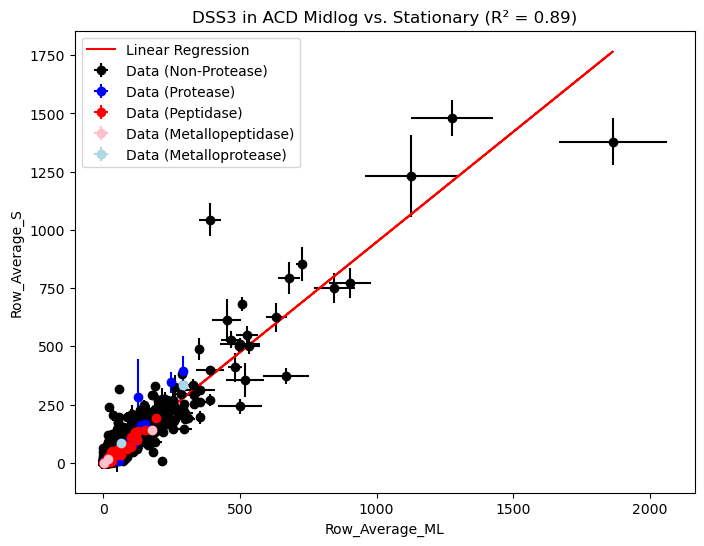

,Value,Annotation,Predicted,Residual
54,274.666667,translation initiation factor IF-2,261.059089,-53.392422
94,85.000000,hypothetical protein,81.526336,67.806997
151,138.000000,"3-isopropylmalate dehydratase, large subunit",131.694539,87.972127
160,36.333333,"PaxA, putative",35.459935,168.873398
167,178.666667,alpha-aminoadipic semialdehyde dehydrogenase,170.188381,119.811619
...,...,...,...,...
2757,0.000000,Heat shock protein,1.067897,61.265437
2782,110.666667,Unknown,105.821629,58.178371
2794,309.333333,Unknown,293.873511,-100.206845
2927,468.333333,Unknown,444.378121,84.621879


In [12]:
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_MLStat["Row_Average_ML"], DSS3_MLStat["Row_Average_S"], DSS3_MLStat["Annotation_ML"], DSS3_MLStat["STD_S"], DSS3_MLStat["STD_ML"], title='DSS3 in ACD Midlog vs. Stationary', filename="DSS3_ACD_MLS.pdf")

# Then extract the outliers
extract_outliers(slope, intercept, std_err, DSS3_MLStat["Row_Average_ML"], DSS3_MLStat["Row_Average_S"], DSS3_MLStat["Annotation_ML"], filename='DSS3_ACD_MLS_outliers.csv')

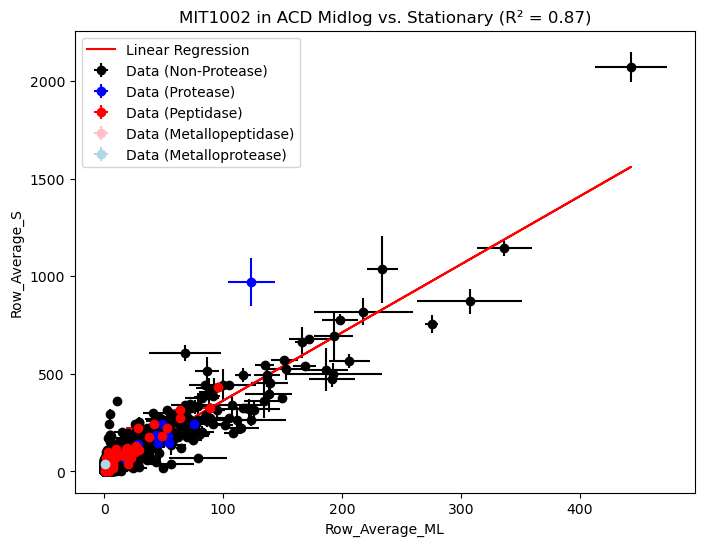

,Value,Annotation,Predicted,Residual
31,4.333333,2-methylcitrate dehydratase (trans-methylaconi...,28.686019,214.980647
32,8.333333,2-methylcitrate synthase [Alteromonas macleodii],42.647232,93.686101
42,16.666667,2-oxoisovalerate dehydrogenase E2 component (d...,71.733092,98.933575
64,68.000000,3-hydroxyacyl-CoA dehydrogenase / enoyl-CoA hy...,250.901987,89.098013
65,28.000000,3-hydroxyacyl-CoA dehydrogenase / enoyl-CoA hy...,111.289861,80.043473
...,...,...,...,...
1552,443.000000,translation elongation factor 1A (EF-1A/EF-Tu)...,1559.765675,512.234325
1556,187.000000,translation elongation factor Ts (EF-Ts) [Alte...,666.248064,-144.248064
1559,121.666667,trigger factor [Alteromonas macleodii],438.214924,-117.548257
1589,5.000000,uncharacterized radical SAM protein YgiQ [Alte...,31.012888,74.320445


In [13]:
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_MLStat["Row_Average_ML"], MIT1002_MLStat["Row_Average_S"], MIT1002_MLStat["Annotation_ML"], MIT1002_MLStat["STD_S"], MIT1002_MLStat["STD_ML"], title='MIT1002 in ACD Midlog vs. Stationary', filename="MIT1002_ACD_MLS.pdf")

# Then extract the outliers
extract_outliers(slope, intercept, std_err, MIT1002_MLStat["Row_Average_ML"], MIT1002_MLStat["Row_Average_S"], MIT1002_MLStat["Annotation_ML"], filename='MIT1002_ACD_MLS_outliers.csv')